In [27]:
#Load the Trained Generator : Rebuild the Generator architecture and load the weights
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

# Same Generator class must be defined
class Generator(nn.Module):
    def __init__(self, noise_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(noise_dim, 256),
            nn.ReLU(True),
            nn.Linear(256, 512),
            nn.ReLU(True),
            nn.Linear(512, 1024),
            nn.ReLU(True),
            nn.Linear(1024, 28*28),
            nn.Tanh()
        )

    def forward(self, z):
        out = self.net(z)
        return out.view(-1, 1, 28, 28)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


# Initialize and load the model
noise_dim = 100
G = Generator(noise_dim)
G.load_state_dict(torch.load('generator.pth', map_location=torch.device('cpu')))
G.eval()  # Set to evaluation mode



Generator(
  (net): Sequential(
    (0): Linear(in_features=100, out_features=256, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): ReLU(inplace=True)
    (4): Linear(in_features=512, out_features=1024, bias=True)
    (5): ReLU(inplace=True)
    (6): Linear(in_features=1024, out_features=784, bias=True)
    (7): Tanh()
  )
)

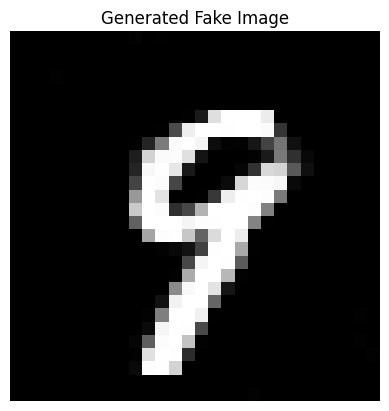

In [40]:
#Generate a Single Fake Image

import matplotlib.pyplot as plt
import torch

# Generate random noise
z = torch.randn(1, noise_dim)  # One image

# Generate image
with torch.no_grad():
    fake_image = G(z)

# Convert to numpy and visualize
image_np = fake_image.squeeze().numpy()  # remove batch & channel dims

plt.imshow(image_np, cmap='gray')
plt.title("Generated Fake Image")
plt.axis('off')
plt.show()